# **Importing Necessary Libraries and The Datasset.**

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv("ObesityDataset.csv")

# **Preprocessing The Dataset.**

In [12]:
# Separate features and target variable
X = data.drop(columns=['NObeyesdad'])
y = data['NObeyesdad']

# Replace NaN values in non-numeric columns with random 'yes' or 'no'
non_numeric_cols = ['family_history_with_overweight', 'FAVC', 'SMOKE']
for col in non_numeric_cols:
    nan_indices = X[col].isna()
    X.loc[nan_indices, col] = np.random.choice(['yes', 'no'], size=nan_indices.sum())

# Impute missing values with mean for numeric columns
numeric_cols = ['FCVC', 'NCP', 'CH2O', 'FAF']
imputer = SimpleImputer(strategy='mean')
X[numeric_cols] = imputer.fit_transform(X[numeric_cols])

# One-hot encode all categorical columns
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
encoder = OneHotEncoder()
encoded_cols = encoder.fit_transform(X[categorical_cols])
encoded_cols = pd.DataFrame(encoded_cols.toarray(), columns=encoder.get_feature_names_out(categorical_cols))

# Combine encoded categorical columns with numeric columns
X_encoded = pd.concat([X.drop(columns=categorical_cols), encoded_cols], axis=1)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scale numeric features using StandardScaler
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Display the preprocessed dataset
X_encoded.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.000000,3.0,2.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,21.0,1.52,56.0,3.000000,3.0,3.0,3.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,23.0,1.80,77.0,2.414899,3.0,2.0,2.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,27.0,1.80,87.0,3.000000,3.0,2.0,2.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,22.0,1.78,89.8,2.000000,1.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# **Building the Model**

In [13]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train models
random_forest_model = RandomForestClassifier(random_state=42)
logistic_regression_model = LogisticRegression(max_iter=1000, random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Dictionary to hold the models
models = {
    "Random Forest": random_forest_model,
    "Logistic Regression": logistic_regression_model,
    "Decision Tree": decision_tree_model,
    "Gradient Boosting": gradient_boosting_model
}

# Train and print status
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    print("Done!")

# Evaluate models
for name, model in models.items():
    print(f"Evaluating {name}:")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    g_mean = balanced_accuracy_score(y_test, y_pred)
    print(f"G-Mean: {g_mean}")
    print("\n")
    print(confusion_matrix(y_test, y_pred))
    print("\n")


Training Random Forest...


Done!
Training Logistic Regression...


c:\Users\Anish Kundu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Done!
Training Decision Tree...
Done!
Training Gradient Boosting...
Done!
Evaluating Random Forest:
                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.95      0.96        56
      Normal_Weight       0.82      0.87      0.84        62
     Obesity_Type_I       0.97      0.95      0.96        78
    Obesity_Type_II       0.98      0.98      0.98        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.89      0.86      0.87        56
Overweight_Level_II       0.90      0.94      0.92        50

           accuracy                           0.94       423
          macro avg       0.94      0.94      0.94       423
       weighted avg       0.94      0.94      0.94       423

G-Mean: 0.9351451057020738


[[53  3  0  0  0  0  0]
 [ 1 54  0  0  0  4  3]
 [ 0  2 74  1  0  0  1]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  7  0  0  0 48  1]
 [ 0  0  1  0  0  2 47]]


Evaluating Logistic Regres

## **Testing the Model**

# **Ploting the Graphs**

### **Confusing Matrix**

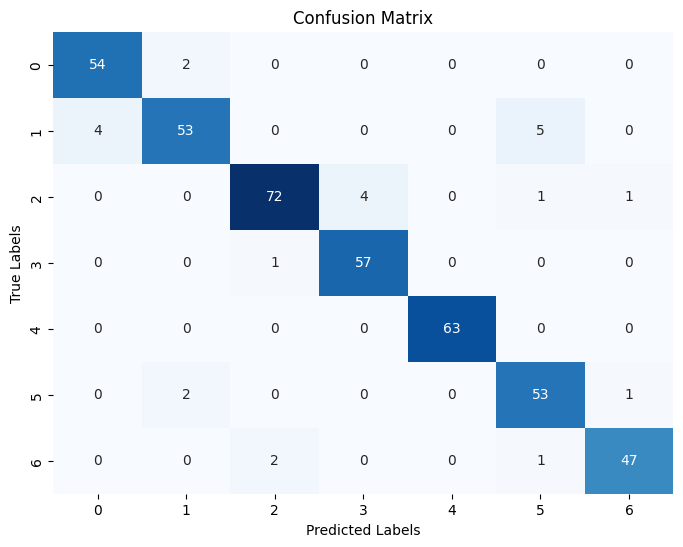

In [14]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### **Acuracy VS Model**

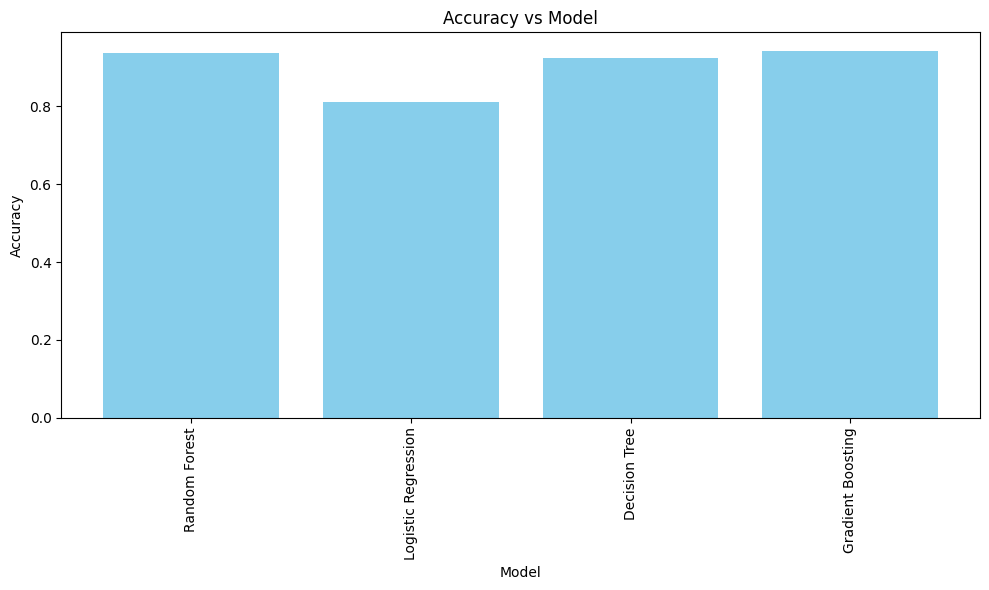

In [15]:
from sklearn.metrics import accuracy_score

# Dictionary to store accuracy scores for each model
accuracy_scores = []

# Loop through each model
for name, model in models.items():
    # Make predictions
    y_pred = model.predict(X_test)
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    # Store accuracy score in the list
    accuracy_scores.append(accuracy)

plt.figure(figsize=(10, 6))
plt.bar(models.keys(), accuracy_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Model')
plt.xticks(rotation=90)
plt.grid(False)
plt.tight_layout()
plt.show()


### **Efficiency**

c:\Users\Anish Kundu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


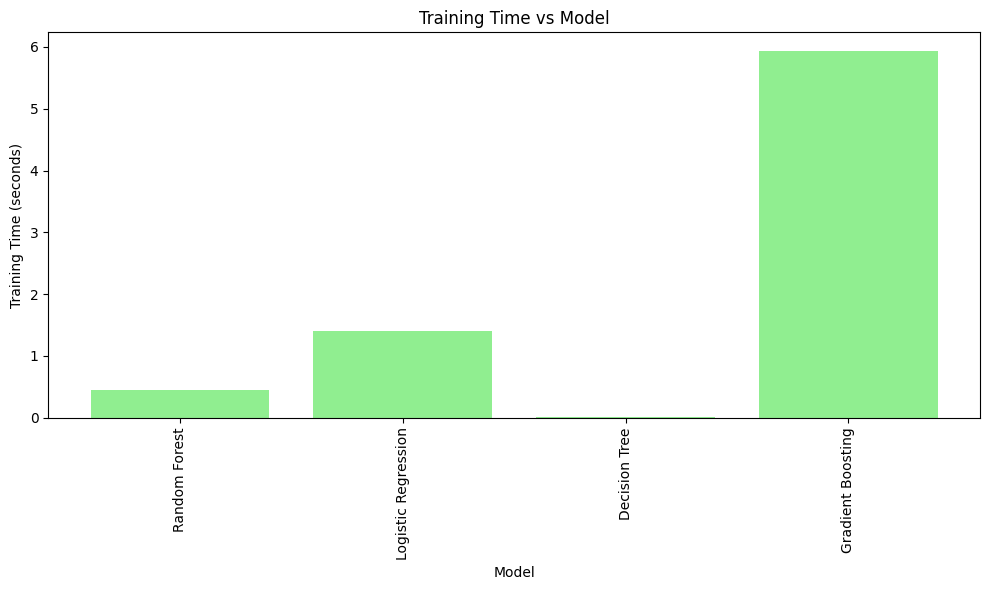

In [16]:
import time

# Dictionary to store training times for each model
training_times = []

# Loop through each model
for name, model in models.items():
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    # Calculate training time
    training_time = end_time - start_time
    # Store training time in the list
    training_times.append(training_time)

plt.figure(figsize=(10, 6))
plt.bar(models.keys(), training_times, color='lightgreen')
plt.xlabel('Model')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs Model')
plt.xticks(rotation=90)
plt.grid(False)
plt.tight_layout()
plt.show()